In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
uploaded = files.upload()

Saving bonum.csv to bonum.csv


In [3]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  2530 non-null   int64
 1   Price   2530 non-null   int64
 2   Num     2530 non-null   int64
dtypes: int64(3)
memory usage: 59.4 KB


In [ ]:
#df.drop(columns=["Num"],inplace=True)

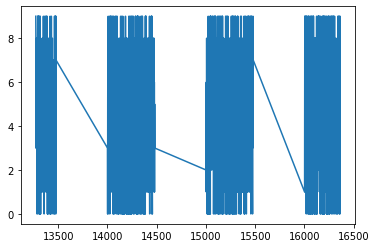

In [ ]:
period = df["Period"].values
period = np.mod(period,100000)
num = df["Num"].values
plt.plot(period,num)
plt.show()


In [ ]:
num = num.reshape((-1,1))
split = int(0.80*len(num))
train_x = num[:split]
test_x = num[split:]
print("shape of train_x :::",train_x.shape)
print("shape of test_x :::",test_x.shape)

shape of train_x ::: (1224, 1)
shape of test_x ::: (306, 1)


In [ ]:
look_back = 10
train_generator = TimeseriesGenerator(train_x, train_x, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(test_x, test_x, length=look_back, batch_size=1)


In [ ]:
model = Sequential()
model.add(LSTM(10,activation="relu",input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit_generator(train_generator, epochs=25, verbose=1)

Epoch 1/25
61/61 [==============================] - 0s 4ms/step - loss: 29.4761
Epoch 2/25
61/61 [==============================] - 0s 5ms/step - loss: 27.6503
Epoch 3/25
61/61 [==============================] - 0s 5ms/step - loss: 23.0817
Epoch 4/25
61/61 [==============================] - 0s 5ms/step - loss: 9.0491
Epoch 5/25
61/61 [==============================] - 0s 4ms/step - loss: 9.0226
Epoch 6/25
61/61 [==============================] - 0s 4ms/step - loss: 8.8922
Epoch 7/25
61/61 [==============================] - 0s 5ms/step - loss: 9.0983
Epoch 8/25
61/61 [==============================] - 0s 4ms/step - loss: 8.7633
Epoch 9/25
61/61 [==============================] - 0s 4ms/step - loss: 8.7061
Epoch 10/25
61/61 [==============================] - 0s 5ms/step - loss: 8.6784
Epoch 11/25
61/61 [==============================] - 0s 5ms/step - loss: 8.6631
Epoch 12/25
61/61 [==============================] - 0s 4ms/step - loss: 8.6943
Epoch 13/25
61/61 [===========================

In [ ]:
prediction = model.predict(test_generator)

In [ ]:
np.unique(prediction)

array([3.4626997, 3.7020698, 3.731622 , 3.7771175, 3.7825649, 3.8246121,
       3.8256829, 3.826162 , 3.8382332, 3.840432 , 3.8548825, 3.8598273,
       3.8609314, 3.8766496, 3.8822935, 3.882542 , 3.8918147, 3.8926249,
       3.895716 , 3.9072924, 3.9214005, 3.9243002, 3.9281504, 3.9347482,
       3.9364936, 3.9412868, 3.9482322, 3.9502313, 3.9551566, 3.9560034,
       3.9631283, 3.9714653, 3.9740453, 3.9805503, 3.9886286, 3.9894512,
       3.9925296, 3.995578 , 3.9967692, 3.997285 , 3.9988294, 4.008203 ,
       4.011893 , 4.0145516, 4.0176473, 4.018292 , 4.020487 , 4.0204935,
       4.0214477, 4.0260196, 4.031099 , 4.0321712, 4.032452 , 4.040373 ,
       4.0404925, 4.0432262, 4.04378  , 4.045245 , 4.047637 , 4.0522203,
       4.0527835, 4.0546775, 4.0594306, 4.0604796, 4.0624866, 4.063288 ,
       4.0649276, 4.064956 , 4.066382 , 4.0674653, 4.0692863, 4.0721073,
       4.0752764, 4.076991 , 4.0790825, 4.079239 , 4.084351 , 4.0844316,
       4.084996 , 4.0857444, 4.085956 , 4.087519 , 

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (look_back, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit_generator(train_generator, epochs=25, verbose=1)

Epoch 1/25
61/61 [==============================] - 1s 19ms/step - loss: 11.8308
Epoch 2/25
61/61 [==============================] - 1s 22ms/step - loss: 8.6419
Epoch 3/25
61/61 [==============================] - 1s 20ms/step - loss: 8.6512
Epoch 4/25
61/61 [==============================] - 1s 20ms/step - loss: 8.6102
Epoch 5/25
61/61 [==============================] - 1s 20ms/step - loss: 8.5638
Epoch 6/25
61/61 [==============================] - 1s 20ms/step - loss: 8.5612
Epoch 7/25
61/61 [==============================] - 1s 20ms/step - loss: 8.6269
Epoch 8/25
61/61 [==============================] - 1s 20ms/step - loss: 8.5962
Epoch 9/25
61/61 [==============================] - 1s 20ms/step - loss: 8.6111
Epoch 10/25
61/61 [==============================] - 1s 20ms/step - loss: 8.7063
Epoch 11/25
61/61 [==============================] - 1s 22ms/step - loss: 8.5735
Epoch 12/25
61/61 [==============================] - 1s 21ms/step - loss: 8.5048
Epoch 13/25
61/61 [=================

In [ ]:
prediction = regressor.predict(test_generator)

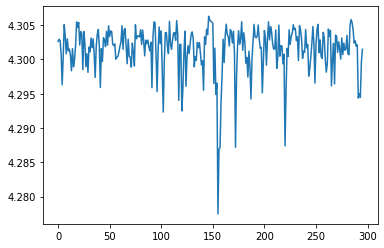

In [ ]:
plt.plot(prediction)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  2530 non-null   int64
 1   Price   2530 non-null   int64
 2   Num     2530 non-null   int64
dtypes: int64(3)
memory usage: 59.4 KB


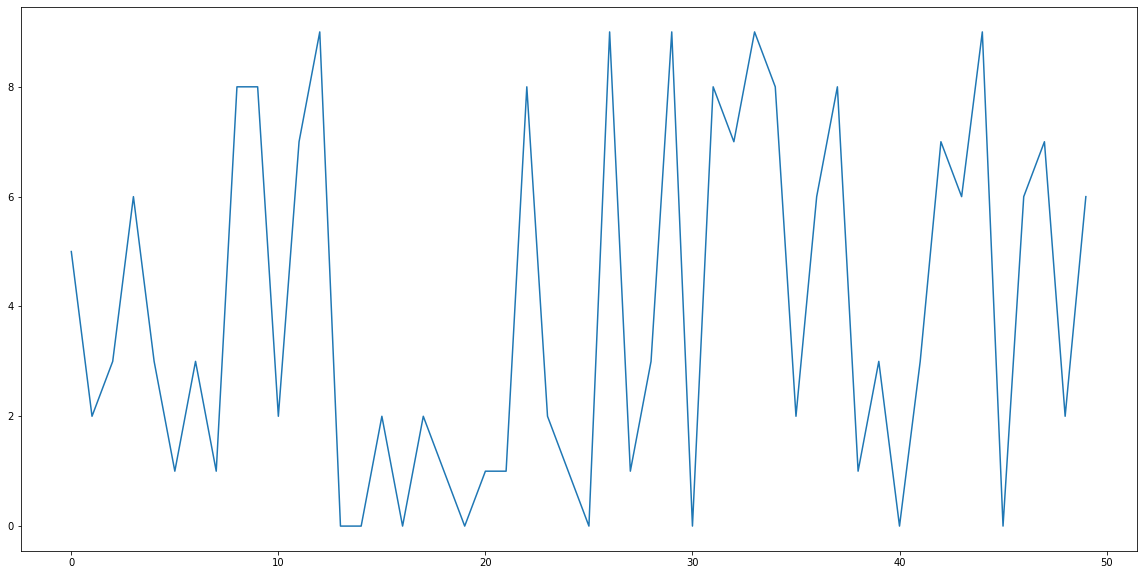

In [78]:
data = df['Num'].values
plt.plot(data[:50])
plt.show()

In [24]:
data = data[::-1]
data = np.reshape(data,(data.shape[0],1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [ ]:

data = np.reshape(data,(data.shape[0],1))

In [ ]:
dataset = data/10
np.unique(dataset)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test))

2150 380


In [25]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [120]:
np.random.seed(7)
data = df['Num'].values
data = data.astype("float32")
data = data.reshape((-1,1))
data = data[::-1]
dataset = data/10
np.unique(dataset)
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test))

2150 380


In [121]:
look_back = 10
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)

In [122]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [82]:
model = Sequential()
model.add(LSTM(200, input_shape=(1, look_back),return_sequences = True,activation="relu"))
model.add(Dropout(0.3))
model.add(LSTM(100,return_sequences = True,activation="relu"))
model.add(Dropout(0.25))
model.add(LSTM(50,return_sequences = False,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [219]:
model = Sequential()
model.add(LSTM(200,input_shape = (1, look_back), return_sequences = True,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences = True,activation="relu"))
model.add(Dropout(0.35))
model.add(LSTM(100,return_sequences = False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [220]:
model.fit(train_x,train_y,epochs = 450,verbose=2,batch_size=512, shuffle=False)

Epoch 1/450
5/5 - 0s - loss: 0.2762
Epoch 2/450
5/5 - 0s - loss: 0.2593
Epoch 3/450
5/5 - 0s - loss: 0.2365
Epoch 4/450
5/5 - 0s - loss: 0.2038
Epoch 5/450
5/5 - 0s - loss: 0.1557
Epoch 6/450
5/5 - 0s - loss: 0.1025
Epoch 7/450
5/5 - 0s - loss: 0.1016
Epoch 8/450
5/5 - 0s - loss: 0.0955
Epoch 9/450
5/5 - 0s - loss: 0.0913
Epoch 10/450
5/5 - 0s - loss: 0.0926
Epoch 11/450
5/5 - 0s - loss: 0.0911
Epoch 12/450
5/5 - 0s - loss: 0.0892
Epoch 13/450
5/5 - 0s - loss: 0.0890
Epoch 14/450
5/5 - 0s - loss: 0.0902
Epoch 15/450
5/5 - 0s - loss: 0.0879
Epoch 16/450
5/5 - 0s - loss: 0.0880
Epoch 17/450
5/5 - 0s - loss: 0.0867
Epoch 18/450
5/5 - 0s - loss: 0.0878
Epoch 19/450
5/5 - 0s - loss: 0.0875
Epoch 20/450
5/5 - 0s - loss: 0.0874
Epoch 21/450
5/5 - 0s - loss: 0.0873
Epoch 22/450
5/5 - 0s - loss: 0.0876
Epoch 23/450
5/5 - 0s - loss: 0.0862
Epoch 24/450
5/5 - 0s - loss: 0.0863
Epoch 25/450
5/5 - 0s - loss: 0.0852
Epoch 26/450
5/5 - 0s - loss: 0.0867
Epoch 27/450
5/5 - 0s - loss: 0.0853
Epoch 28/4

In [221]:
trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

In [222]:
len(np.unique(testPredict))

369

In [223]:
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict.shape

(2139, 1)

In [224]:
import math
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.29 RMSE
Test Score: 2.94 RMSE


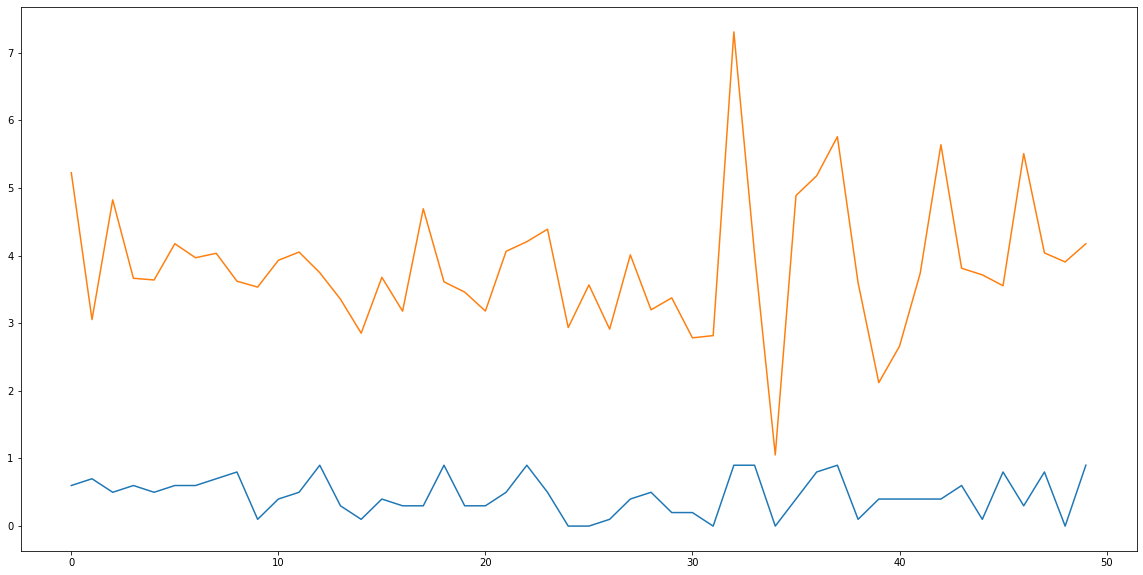

In [225]:
train_plot = [(i,j) for i,j in zip(train_y[:50],trainPredict[:50])]

plt.plot(train_plot)
plt.show()

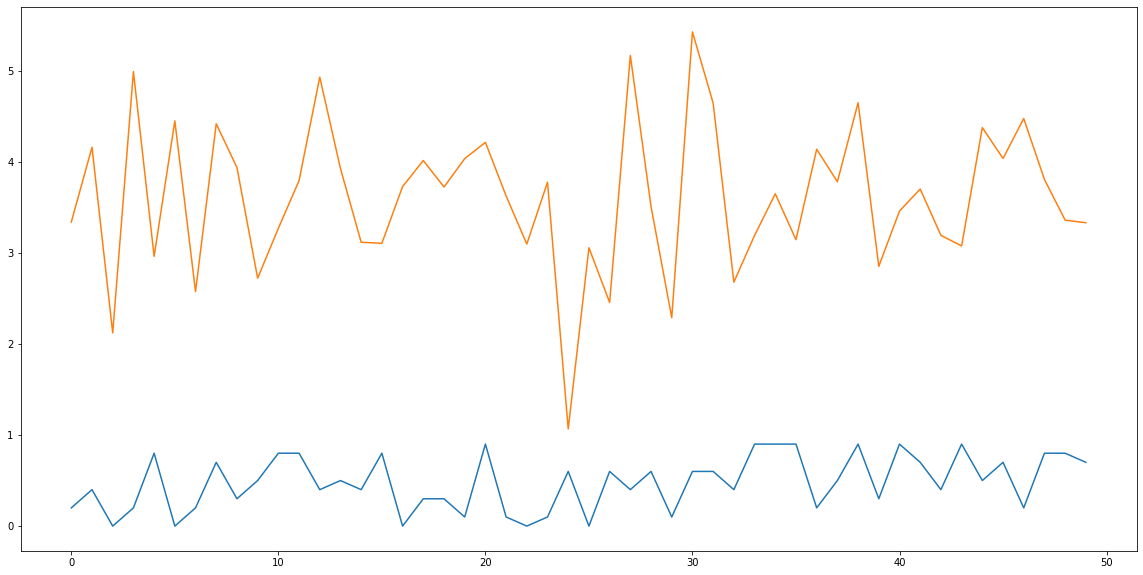

In [226]:
train_plot = [(i,j) for i,j in zip(test_y[:50],testPredict[:50])]

plt.plot(train_plot)
plt.show()

In [ ]:
test_x.shape

(369, 1, 10)

In [ ]:
val_x = [4,6,3,8,2]
val_x = val_x[::-1]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,5))

In [ ]:
val = np.squeeze(np.round(model.predict(val_x)*10))
print("red" if val%2==0 else "green")

green


In [ ]:
model.predict(val_x)

array([[0.47765648]], dtype=float32)

In [ ]:
val_x = [9,4,9,9,4,1,7,7,4,2]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,10))

In [ ]:
np.unique(testPredict)

array([-4.511395  , -2.1692955 , -1.5648576 , -0.51119757, -0.03092493,
        0.05258471,  0.17721583,  0.27523306,  0.2937835 ,  0.60842395,
        0.6136371 ,  0.6233368 ,  0.8159661 ,  1.058811  ,  1.1260105 ,
        1.1533082 ,  1.216738  ,  1.2772435 ,  1.2964182 ,  1.4947896 ,
        1.5454955 ,  1.6657078 ,  1.8188089 ,  1.8425233 ,  1.8634242 ,
        1.8759334 ,  1.918032  ,  2.0664303 ,  2.1613908 ,  2.1928415 ,
        2.2333062 ,  2.2915623 ,  2.309398  ,  2.3265326 ,  2.3334408 ,
        2.3445706 ,  2.366714  ,  2.3735456 ,  2.4140394 ,  2.4373622 ,
        2.4500513 ,  2.475035  ,  2.4782856 ,  2.4872632 ,  2.496115  ,
        2.5094445 ,  2.6143792 ,  2.6418307 ,  2.6540146 ,  2.6713297 ,
        2.7174911 ,  2.7247188 ,  2.745253  ,  2.7457535 ,  2.7866454 ,
        2.788039  ,  2.8248177 ,  2.8358796 ,  2.8655057 ,  2.9190266 ,
        2.9196975 ,  2.942189  ,  2.9853709 ,  2.9883218 ,  3.0044785 ,
        3.0134025 ,  3.0159743 ,  3.0563178 ,  3.0678978 ,  3.10